In [144]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random
import numpy as np
from scipy import stats

In [145]:
n = 'n'
m = 'm'
p = 'p'
it = 'it'
diff = 'diff'
calidad = 'Diferencia vs solución exacta'

error_rate = 'Porcentaje de error: {0:2.2f}%'

blue='#4C72B0'
green='#55A868'
red='#C44E52'

In [146]:
greedy = pd.read_csv('accuracy-greedy.csv')
local = pd.read_csv('accuracy-local.csv')
grasp = pd.read_csv('accuracy-grasp.csv')

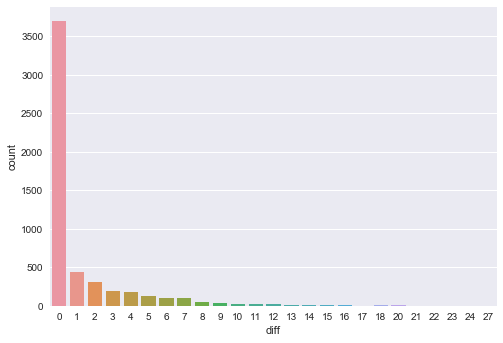

Porcentaje de error: 30.98%


,n,m,diff
max,40.000000,390.000000,27.000000
mean,30.449524,119.549543,1.229147
std,7.789745,92.072989,2.669999


In [147]:
sns.countplot(x=diff, data=greedy)
ax = plt.show()

greedy_count = greedy.groupby([diff])[n].agg(['count']).reset_index()
greedy_sum = greedy_count['count'].agg(['sum']).get(0)

percent = (greedy_sum - greedy_count['count'][0])/greedy_sum
print(error_rate.format(percent*100))

greedy.agg(['max', 'mean', np.std])

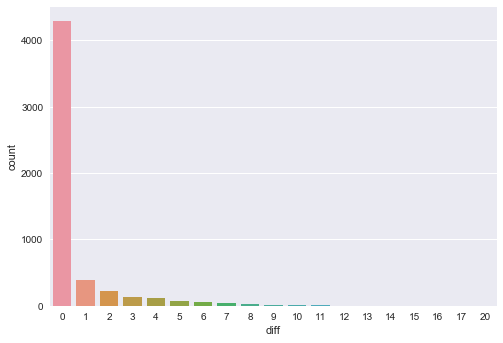

Porcentaje de error: 19.97%


,n,m,diff
max,40.000000,390.000000,20.000000
mean,30.449524,119.549543,0.615040
std,7.789745,92.072989,1.697704


In [148]:
sns.countplot(x=diff, data=local)
plt.show()

local_count = local.groupby([diff])[n].agg(['count']).reset_index()
local_sum = local_count['count'].agg(['sum']).get(0)

percent = (local_sum - local_count['count'][0])/local_sum
print(error_rate.format(percent*100))

local.agg(['max', 'mean', np.std])

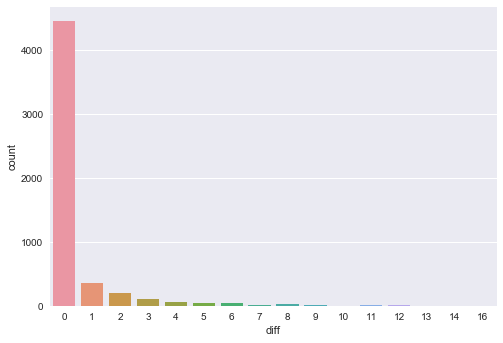

In [149]:
test = grasp[(grasp.p == 0.5) & (grasp.it == 5)]
sns.countplot(x=diff, data=test)
plt.show()

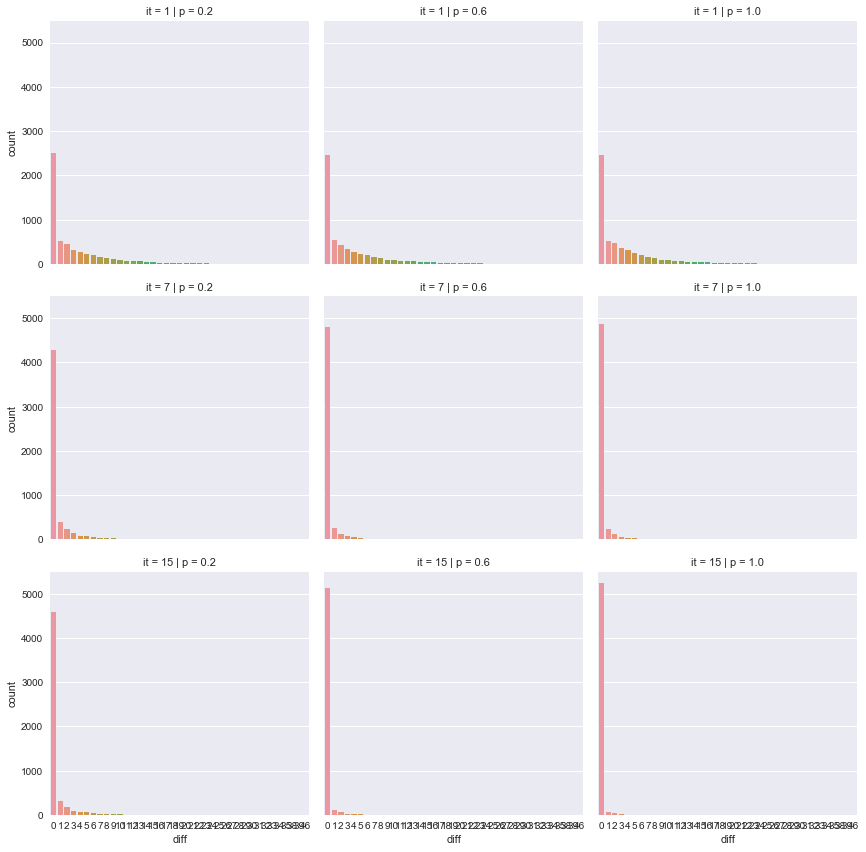

In [153]:
grasp_test = grasp[((grasp.p == 0.2) | (grasp.p == 0.6) | (grasp.p == 1))
                    & ((grasp.it == 1) | (grasp.it == 7) | (grasp.it == 15))]

sns.factorplot(
    x=diff, data=grasp_test,
    col=p, row=it,
    kind="count"
)
plt.show()

In [154]:
grasp_test = grasp[(grasp.p == 0.6) & (grasp.it == 15)]

grasp_count = grasp_test.groupby([diff])[n].agg(['count']).reset_index()
grasp_sum = grasp_count['count'].agg(['sum']).get(0)

percent = (grasp_sum - grasp_count['count'][0])/grasp_sum
print(error_rate.format(percent*100))

grasp_test.agg(['max', 'mean', np.std])

Porcentaje de error: 4.22%


,n,m,p,it,diff
max,40.000000,390.000000,0.6,15.0,9.000000
mean,30.449524,119.549543,0.6,15.0,0.087330
std,7.789745,92.072989,0.0,0.0,0.528601
